# LAB 4

### Task 1 : Try the algo on Same Whether dataset - LabelEncoding of features:and Train test Division 95%-5%



In [2]:
from sklearn import preprocessing

In [3]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [4]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [5]:
#Combinig outlook, temprature, wind and humidity into single listof tuples

features=tuple(zip(Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded))
print("Features:",features)

Features: ((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))


In [6]:
from sklearn.model_selection import train_test_split

#split data set into train and test sets

x_train, x_test, y_train, y_test = train_test_split(features,
                        Play_encoded, test_size = 0.05, random_state = 129)

In [7]:
from sklearn.tree import DecisionTreeClassifier

#Create a Decision Tree Classifier (using Entropy)
clf=DecisionTreeClassifier(criterion='gini')

# Train the model using the training sets
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [8]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)
print(y_pred)

[1]


[Text(148.8, 195.696, 'X[2] <= 0.5\ngini = 0.473\nsamples = 13\nvalue = [5, 8]\nclass = yes'),
 Text(74.4, 152.208, 'X[0] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = no'),
 Text(37.2, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = yes'),
 Text(111.60000000000001, 108.72, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = no'),
 Text(74.4, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = no'),
 Text(148.8, 65.232, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = no'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = yes'),
 Text(186.0, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no'),
 Text(223.20000000000002, 152.208, 'X[3] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = yes'),
 Text(186.0, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = yes'),
 Text(260.40000000000003, 108.72, 'X[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = yes'),
 Text(2

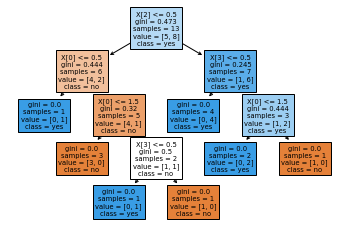

In [9]:
from sklearn import tree

tree.plot_tree(clf,filled=True,class_names=['no','yes'])

In [10]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

print("\nConfusion Matrix :")
confusion_matrix(y_test, y_pred)

Accuracy: 1.0

Confusion Matrix :


array([[1]])

In [11]:
precision = precision_score(y_test, y_pred)
print('\nprecision: {}'.format(precision))

recall = recall_score(y_test, y_pred)
print('\nrecall: {}'.format(recall))


precision: 1.0

recall: 1.0


#### (1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’? 

In [12]:
predicted= clf.predict([[1,2,0,1]])
print("Predicted Value:", predicted)

Predicted Value: [0]


#### (2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’? 

In [13]:
predicted= clf.predict([[2,0,1,2]])
print("Predicted Value:", predicted)

Predicted Value: [0]
